In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# create shortcut path 
path = r"C:\Users\HP\Documents\06-2024 Instacart Basket Analysis"

In [3]:
# import data set
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
ords_prods_all.shape

(32404859, 32)

# 02. Addressing security implications

In [10]:
# removing the first and last names from the dataset
ords_prods_all.drop(columns = ["first_name", "last_name"], inplace = True)

In [11]:
ords_prods_all.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_spend',
       'spending_flag', 'customer_frequency', 'frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'n_dependants', 'fam_status', 'income'],
      dtype='object')

# 03. Regional segmentation of the data

In [13]:
# creating the Northeast region
northeast_region = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [14]:
# creating the Midwest region
midwest_region = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [15]:
# creating the South region
south_region = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [16]:
# creating the West region
west_region = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [17]:
# creating "region" column
ords_prods_all.loc[ords_prods_all['state'].isin(northeast_region), 'region'] = 'northeast'

In [18]:
ords_prods_all.loc[ords_prods_all['state'].isin(midwest_region), 'region'] = 'midwest'

In [19]:
ords_prods_all.loc[ords_prods_all['state'].isin(south_region), 'region'] = 'south'

In [20]:
ords_prods_all.loc[ords_prods_all['state'].isin(west_region), 'region'] = 'west'

In [21]:
# validating column creation
len(ords_prods_all['region'])

32404859

In [22]:
# "region" column frequency check
ords_prods_all['region'].value_counts(dropna = False)

region
south        10791885
west          8292913
midwest       7597325
northeast     5722736
Name: count, dtype: int64

In [9]:
# using a crosstab to view spending habits between regions
region_spending_crosstab = pd.crosstab(ords_prods_all['region'], ords_prods_all['spending_flag'], dropna = False)

In [11]:
# view table
region_spending_crosstab

spending_flag,High spender,Low spender
region,,
midwest,148678,7112835
northeast,103120,5361565
south,199339,10111800
west,152288,7774939


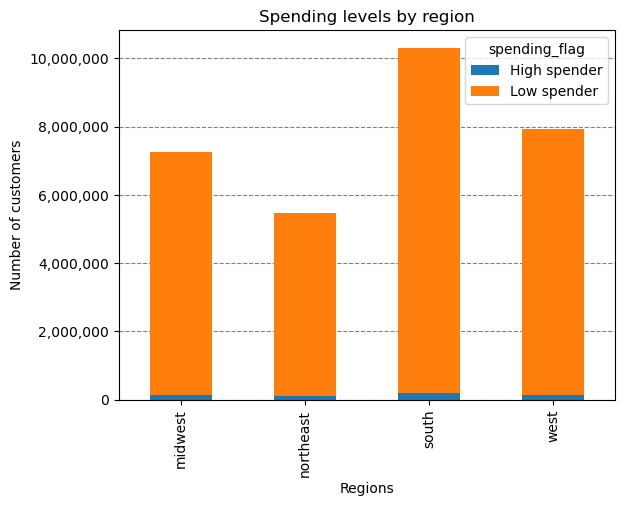

In [17]:
region_spending_crosstab.plot.bar(stacked = True)
plt.title('Spending levels by region')
plt.ylabel('Number of customers')
plt.xlabel('Regions')
plt.gca().set_axisbelow (True)
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.gca().yaxis.set_major_formatter(format('{x:,.0f}'))
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spenders_region.png'), bbox_inches='tight')

The region with the most spenders is the south region in both the High and Low category. Coming in with the least amount of High and Low spenders is the northeast region. This is not surpising because the South has the most customers in the dataframe whereas the Northeast has the least amount of customers in the dataframe. The interesting thing here is that there are much more low spenders in general than high spenders, and that looks to be an indicator of where to place the targeted marketing.

# 04. Low-Activity Customers

In [27]:
# creating an 'exclusion-flag' for low-activity customers (less than 5 orders)
ords_prods_all.loc[ords_prods_all['max_order'] >= 5, 'exclusion_flag'] = 'include'

In [28]:
ords_prods_all.loc[ords_prods_all['max_order'] < 5, 'exclusion_flag'] = 'exclude'

In [29]:
# validate "exclusion_flag" column was created
ords_prods_all.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region,exclusion_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,midwest,include
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,midwest,include
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,northeast,include
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,midwest,exclude
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,midwest,exclude


In [30]:
# "exclusion_flag" frequency count
ords_prods_all['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
include    30964564
exclude     1440295
Name: count, dtype: int64

In [31]:
# creating sample of dataframe to remove the excluded rows
ords_prods_all = ords_prods_all[ords_prods_all['exclusion_flag'] == 'include']

In [32]:
ords_prods_all.shape

(30964564, 32)

The shape of the sample dataframe matches the included amount per the frequency check

In [55]:
# exporting updated dataframe
ords_prods_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_v2.pkl'))

# Savepoint

This is the end of a section, where I will be breaking the script into a section to improve computer function and minimize RAM usage

In [5]:
# import updated data set
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_v2.pkl'))

In [6]:
# confirming dimensions are correct
ords_prods_all.shape

(30964564, 32)

# 05. Customer Profiling

### Age

The following age groups will be used:

Young adult: <= 29

Adult: >29 to <=49

Older Adult: >49 to <=64

Senior: >64

In [18]:
# creating age_group" column
ords_prods_all.loc[ords_prods_all['age'] <= 29, 'age_group'] = 'young_adult'

In [19]:
ords_prods_all.loc[(ords_prods_all['age'] > 29) & (ords_prods_all['age'] <= 49), 'age_group'] = 'adult'

In [20]:
ords_prods_all.loc[(ords_prods_all['age'] > 49) & (ords_prods_all['age'] <= 64), 'age_group'] = 'older_adult'

In [21]:
ords_prods_all.loc[ords_prods_all['age'] > 64, 'age_group'] = 'senior'

In [22]:
# validate "age_group" column was created
ords_prods_all.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,gender,state,age,date_joined,n_dependants,fam_status,income,region,exclusion_flag,age_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Male,Minnesota,81,8/1/2019,1,married,49620,midwest,include,senior
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Male,Minnesota,81,8/1/2019,1,married,49620,midwest,include,senior
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Female,Vermont,66,6/16/2018,2,married,158302,northeast,include,senior
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,Female,Hawaii,51,1/4/2019,2,married,57797,west,include,older_adult
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,south,include,young_adult


In [23]:
# "age_group" frequency count
ords_prods_all['age_group'].value_counts(dropna = False)

age_group
adult          9730686
senior         8195544
older_adult    7220731
young_adult    5817603
Name: count, dtype: int64

### Income

The following income groups will be used:

Low: <= 50,000

Middle: > 50,000 to <= 100,000

Upper: > 100,000

In [29]:
# creating "income_group" column
ords_prods_all.loc[ords_prods_all['income'] <= 50000, 'income_group'] = 'low'

In [30]:
ords_prods_all.loc[(ords_prods_all['income'] > 50000) & (ords_prods_all['income'] <= 100000), 'income_group'] = 'middle'

In [31]:
ords_prods_all.loc[ords_prods_all['income'] > 100000, 'income_group'] = 'upper'

In [32]:
# validate "income_group" column was created
ords_prods_all.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,state,age,date_joined,n_dependants,fam_status,income,region,exclusion_flag,age_group,income_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Minnesota,81,8/1/2019,1,married,49620,midwest,include,senior,low
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Minnesota,81,8/1/2019,1,married,49620,midwest,include,senior,low
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Vermont,66,6/16/2018,2,married,158302,northeast,include,senior,upper
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,Hawaii,51,1/4/2019,2,married,57797,west,include,older_adult,middle
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,south,include,young_adult,low


In [33]:
# "income_group" frequency count
ords_prods_all['income_group'].value_counts(dropna = False)

income_group
upper     14207028
middle    13394982
low        3362554
Name: count, dtype: int64

### Dependents

The following dependent groups will be

No dependents: "n_dependants" == 0

Has Dependents: "n_dependants" > 0

In [38]:
# creating "dependents_group" column
ords_prods_all.loc[ords_prods_all['n_dependants'] == 0, 'dependents_group'] = 'no_dependents'

In [39]:
ords_prods_all.loc[ords_prods_all['n_dependants'] > 0, 'dependents_group'] = 'has_dependents'

In [40]:
# validate "dependents_group" was created
ords_prods_all.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,age,date_joined,n_dependants,fam_status,income,region,exclusion_flag,age_group,income_group,dependents_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,81,8/1/2019,1,married,49620,midwest,include,senior,low,has_dependents
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,81,8/1/2019,1,married,49620,midwest,include,senior,low,has_dependents
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,66,6/16/2018,2,married,158302,northeast,include,senior,upper,has_dependents
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,51,1/4/2019,2,married,57797,west,include,older_adult,middle,has_dependents
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,20,5/8/2019,3,living with parents and siblings,34171,south,include,young_adult,low,has_dependents


In [43]:
# "dependents_group" frequency count
ords_prods_all['dependents_group'].value_counts(dropna = False)

dependents_group
has_dependents    23224883
no_dependents      7739681
Name: count, dtype: int64

In [57]:
ords_prods_all['fam_status'].value_counts(dropna = False)

fam_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

### Pet or Baby Grouping

I will be creating a flag to indicate if the purchase was in the babies (department_id: 18) category or the pets (department_id: 8) category. Combined with the "dependants_group", this will give me information if the consumer is possibly a young adult with or without children and has a pet.

In [52]:
# creating a loop statement 
result = []

for value in ords_prods_all["department_id"]:
  if value == 18:
    result.append("baby_purchase")
  elif value == 8:
    result.append("pet_purchase")
  else:
    result.append("neither")

In [54]:
# creating "baby_or_pet" column based on results above
ords_prods_all['baby_or_pet'] = result

In [56]:
# "baby_or_pet" frequency check
ords_prods_all['baby_or_pet'].value_counts(dropna = False)

baby_or_pet
neither          30461112
baby_purchase      410392
pet_purchase        93060
Name: count, dtype: int64

In [58]:
# validate "baby_or_pet" column was created
ords_prods_all.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,date_joined,n_dependants,fam_status,income,region,exclusion_flag,age_group,income_group,dependents_group,baby_or_pet
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,8/1/2019,1,married,49620,midwest,include,senior,low,has_dependents,neither
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,8/1/2019,1,married,49620,midwest,include,senior,low,has_dependents,neither
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,6/16/2018,2,married,158302,northeast,include,senior,upper,has_dependents,neither
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,1/4/2019,2,married,57797,west,include,older_adult,middle,has_dependents,neither
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,5/8/2019,3,living with parents and siblings,34171,south,include,young_adult,low,has_dependents,neither


In [60]:
# exporting updated dataframe
ords_prods_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_v3.pkl'))

# Savepoint

This is the end of a section, where I will be breaking the script into a section to improve computer function and minimize RAM usage.

In [7]:
# import updated data set
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_v3.pkl'))

In [8]:
# confirming dimensions are correct
ords_prods_all.shape

(30964564, 36)

In [9]:
ords_prods_all.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_spend',
       'spending_flag', 'customer_frequency', 'frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'n_dependants', 'fam_status', 'income',
       'region', 'exclusion_flag', 'age_group', 'income_group',
       'dependents_group', 'baby_or_pet'],
      dtype='object')

# 06. Visualizations for the customer profiles

Creating a subset that includes the customer profiles that have been created from the information provided.

In [25]:
# customer profiles subset
customer_profiles = ords_prods_all[['user_id','loyalty_flag','spending_flag','frequency_flag','fam_status','region','age_group','income_group','dependents_group', 'baby_or_pet']]

### Age group distribution

Text(0, 0.5, '')

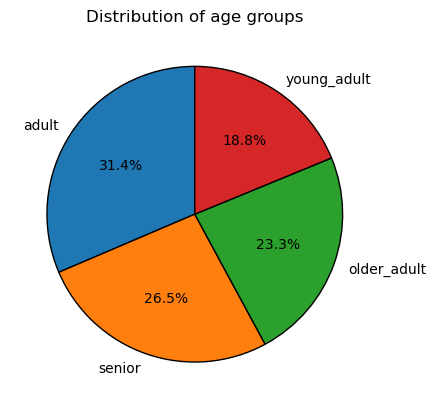

In [21]:
# creating pie chart
age_group_pie = customer_profiles['age_group'].value_counts().plot.pie(autopct = '%.1f%%',
                                                                      wedgeprops = {'edgecolor':'black'},
                                                                      startangle = 90)
plt.title('Distribution of age groups')
plt.ylabel(ylabel = None)

In [21]:
age_group_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group.png'))

### Income group distribution

Text(0, 0.5, '')

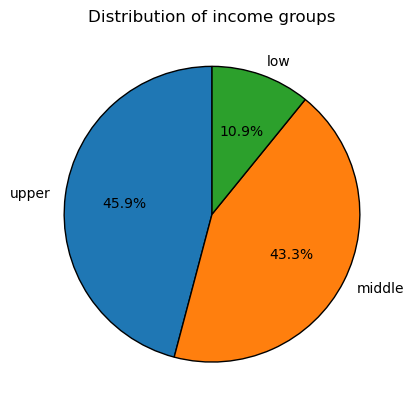

In [23]:
income_group_pie = customer_profiles['income_group'].value_counts().plot.pie(autopct = '%.1f%%',
                                                                      wedgeprops = {'edgecolor':'black'},
                                                                      startangle = 90)
plt.title('Distribution of income groups')
plt.ylabel(ylabel = None)

In [25]:
income_group_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group.png'))

### Distribution of dependents group

Text(0, 0.5, '')

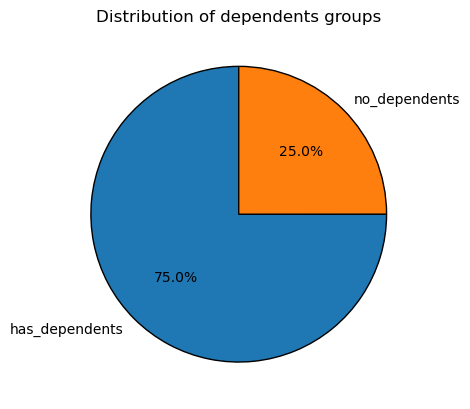

In [20]:
dependents_group_pie = customer_profiles['dependents_group'].value_counts().plot.pie(autopct = '%.1f%%',
                                                                      wedgeprops = {'edgecolor':'black'},
                                                                      startangle = 90)
plt.title('Distribution of dependents groups')
plt.ylabel(ylabel = None)

In [21]:
dependents_group_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependents_group.png'))

### Baby purchases across family statuses

In [30]:
baby_purchases_only = customer_profiles[customer_profiles['baby_or_pet'] == 'baby_purchase']

Text(0, 0.5, '')

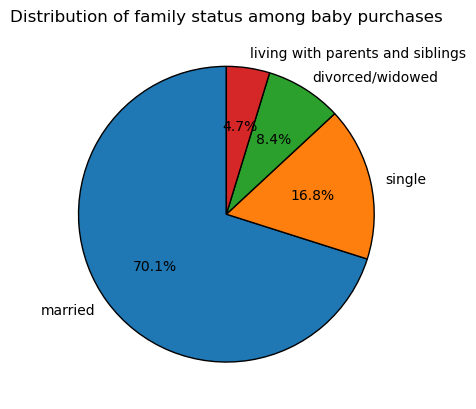

In [32]:
baby_pie = baby_purchases_only['fam_status'].value_counts().plot.pie(autopct = '%.1f%%',
                                                                      wedgeprops = {'edgecolor':'black'},
                                                                      startangle = 90)
plt.title('Distribution of family status among baby purchases')
plt.ylabel(ylabel = None)

In [34]:
baby_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'baby_purchases.png'))

### Pet purchases across family statuses

In [40]:
pet_purchases_only = customer_profiles[customer_profiles['baby_or_pet'] == 'pet_purchase']

Text(0, 0.5, '')

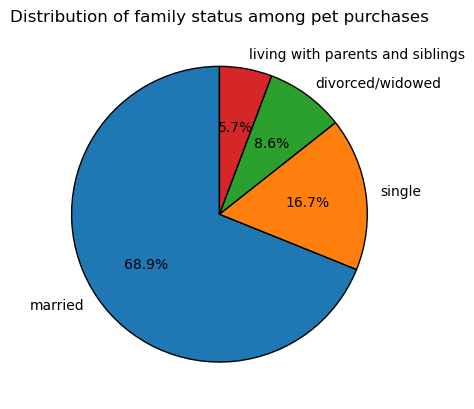

In [42]:
pet_pie = pet_purchases_only['fam_status'].value_counts().plot.pie(autopct = '%.1f%%',
                                                                      wedgeprops = {'edgecolor':'black'},
                                                                      startangle = 90)
plt.title('Distribution of family status among pet purchases')
plt.ylabel(ylabel = None)

In [44]:
pet_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pet_purchases.png'))

In both of the pie charts highlighting baby and pet purchases, it highlights the spending power married couples have. By targeting married couples more so than other family dynamics could result in a higher ROI.

# 07. Aggregation of max, mean, and min variables for customer profiles

In [19]:
# excluding the outlier prices
ords_prods_all.loc[ords_prods_all['prices'] >100, 'prices'] = np.nan

In [23]:
# creating a subset from the overall dataframe
customer_profiles_2 = ords_prods_all.groupby(['user_id', 'loyalty_flag', 'region', 'age_group', 'income_group', 'dependents_group', 'days_since_prior_order'])['prices'].sum().reset_index()

### Loyalty flag aggregation

In [39]:
customer_profiles_2.groupby('loyalty_flag').agg({'days_since_prior_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

days_since_prior_order                  prices              \
                                    min       mean   max    min        mean   
loyalty_flag                                                                  
Loyal customer                      0.0   8.646944  30.0    1.0  337.474640   
New customer                        0.0  15.471100  30.0    0.0  103.024986   
Regular customer                    0.0  12.625105  30.0    0.0  138.225021   

                                
                           max  
loyalty_flag                    
Loyal customer    12420.599609  
New customer       2473.500000  
Regular customer   8522.000000

### Region aggregation

In [41]:
customer_profiles_2.groupby('region').agg({'days_since_prior_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

days_since_prior_order                  prices              \
                             min       mean   max    min        mean   
region                                                                 
midwest                      0.0  12.624557  30.0    0.0  162.549408   
northeast                    0.0  12.591648  30.0    0.0  163.892166   
south                        0.0  12.605956  30.0    0.0  163.656479   
west                         0.0  12.573261  30.0    0.0  164.051636   

                         
                    max  
region                   
midwest    11858.099609  
northeast   9608.599609  
south      12420.599609  
west       11313.400391

### Age group aggregation

In [43]:
customer_profiles_2.groupby('age_group').agg({'days_since_prior_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

days_since_prior_order                  prices              \
                               min       mean   max    min        mean   
age_group                                                                
adult                          0.0  12.599284  30.0    0.0  163.922745   
older_adult                    0.0  12.622718  30.0    0.0  163.424026   
senior                         0.0  12.579369  30.0    0.0  162.808411   
young_adult                    0.0  12.599437  30.0    0.0  164.070999   

                           
                      max  
age_group                  
adult        11858.099609  
older_adult  12420.599609  
senior       11844.900391  
young_adult   8136.399902

### Income group aggregation

In [45]:
customer_profiles_2.groupby('income_group').agg({'days_since_prior_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

days_since_prior_order                  prices              \
                                min       mean   max    min        mean   
income_group                                                              
low                             0.0  13.018041  30.0    1.0  105.499855   
middle                          0.0  12.547015  30.0    0.0  171.581039   
upper                           0.0  12.511631  30.0    0.0  174.985092   

                            
                       max  
income_group                
low            8045.399902  
middle        11858.099609  
upper         12420.599609

### Dependants group aggregation

In [47]:
customer_profiles_2.groupby('dependants_group').agg({'days_since_prior_order':['min', 'mean', 'max'], 'prices':['min', 'mean', 'max']})

days_since_prior_order                  prices              \
                                    min       mean   max    min        mean   
dependants_group                                                              
has_dependants                      0.0  12.597224  30.0    0.0  163.606522   
no_dependants                       0.0  12.606233  30.0    0.0  163.331650   

                                
                           max  
dependants_group                
has_dependants    11858.099609  
no_dependants     12420.599609

# 08. Comparing customer profiles with regions and departments

## Income groups across regions

In [29]:
income_region_crosstab = pd.crosstab(customer_profiles['region'], customer_profiles['income_group'], dropna = False)

In [30]:
income_region_crosstab

income_group,low,middle,upper
region,,,
midwest,783764,3077656,3400093
northeast,587137,2361064,2516484
south,1142572,4504996,4663571
west,849081,3451266,3626880


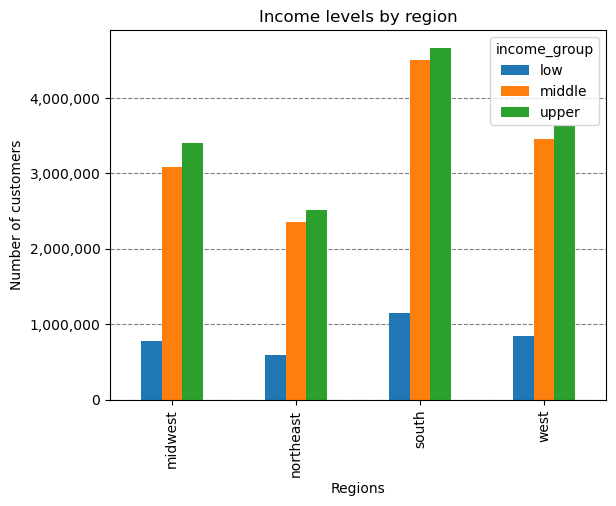

In [33]:
income_region_crosstab.plot.bar()
plt.title('Income levels by region')
plt.ylabel('Number of customers')
plt.xlabel('Regions')
plt.gca().set_axisbelow (True)
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.gca().yaxis.set_major_formatter(format('{x:,.0f}'))
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_by_region.png'), bbox_inches='tight')

## Age groups across regions

In [36]:
# creating a crosstab
age_region_crosstab = pd.crosstab(customer_profiles['region'], customer_profiles['age_group'], dropna = False)

In [37]:
age_region_crosstab

age_group,adult,older_adult,senior,young_adult
region,,,,
midwest,2301964,1699665,1904046,1355838
northeast,1707319,1248575,1484807,1023984
south,3248720,2393307,2708461,1960651
west,2472683,1879184,2098230,1477130


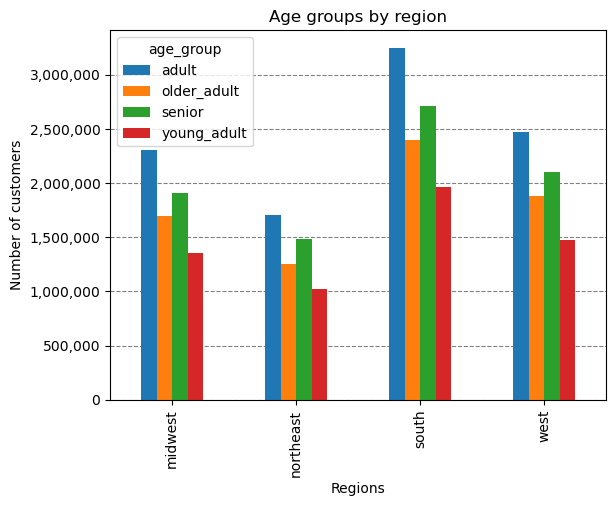

In [40]:
# creating bar chart
age_region_crosstab.plot.bar()
plt.title('Age groups by region')
plt.ylabel('Number of customers')
plt.xlabel('Regions')
plt.gca().set_axisbelow (True)
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.gca().yaxis.set_major_formatter(format('{x:,.0f}'))
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_by_region.png'), bbox_inches='tight')

## Transposing departments data and data_dict creation

In [74]:
# importing 'departments' data set
df_dep = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.pkl'))

In [75]:
df_dep

department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [76]:
# changing "department_id" to string in main dataframe
ords_prods_all['department_id'] = ords_prods_all['department_id'].astype('str') 

In [77]:
ords_prods_all.dtypes

product_id                  int32
product_name               object
aisle_id                    int32
department_id              object
prices                    float32
order_id                    int32
user_id                     int32
order_number                int32
order_day_of_week           int32
order_hour_of_day           int32
days_since_prior_order    float32
add_to_cart_order           int32
reordered                   int32
price_range_loc            object
busiest_day                object
busiest_days               object
busiest_period_of_day      object
max_order                   int32
loyalty_flag               object
average_spend             float32
spending_flag              object
customer_frequency        float32
frequency_flag             object
gender                     object
state                      object
age                         int32
date_joined                object
n_dependants                int32
fam_status                 object
income        

In [78]:
# creating data dictionary
data_dict = df_dep.to_dict('index')

In [79]:
data_dict

{'1': {'department': 'frozen'},
 '2': {'department': 'other'},
 '3': {'department': 'bakery'},
 '4': {'department': 'produce'},
 '5': {'department': 'alcohol'},
 '6': {'department': 'international'},
 '7': {'department': 'beverages'},
 '8': {'department': 'pets'},
 '9': {'department': 'dry goods pasta'},
 '10': {'department': 'bulk'},
 '11': {'department': 'personal care'},
 '12': {'department': 'meat seafood'},
 '13': {'department': 'pantry'},
 '14': {'department': 'breakfast'},
 '15': {'department': 'canned goods'},
 '16': {'department': 'dairy eggs'},
 '17': {'department': 'household'},
 '18': {'department': 'babies'},
 '19': {'department': 'snacks'},
 '20': {'department': 'deli'},
 '21': {'department': 'missing'}}

In [80]:
# connecting department names to main dataframe
ords_prods_all['department'] = ords_prods_all['department_id'].map(lambda x: data_dict[str(x)]['department'])

In [81]:
ords_prods_all.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,n_dependants,fam_status,income,region,exclusion_flag,age_group,income_group,dependents_group,baby_or_pet,department
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,1,married,49620,midwest,include,senior,low,has_dependents,neither,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,1,married,49620,midwest,include,senior,low,has_dependents,neither,snacks
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,2,married,158302,northeast,include,senior,upper,has_dependents,neither,snacks
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,2,married,57797,west,include,older_adult,middle,has_dependents,neither,snacks
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,3,living with parents and siblings,34171,south,include,young_adult,low,has_dependents,neither,snacks


In [82]:
# confirming department id's and departments match
ords_prods_all['department_id'].value_counts(dropna = False)

department_id
4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: count, dtype: int64

In [83]:
ords_prods_all['department'].value_counts(dropna = False)

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

## Departments across regions

In [42]:
# creating a crosstab between departments and region
dept_region_crosstab = pd.crosstab(ords_prods_all['department'], ords_prods_all['region'], dropna = False)

In [43]:
dept_region_crosstab

region,midwest,northeast,south,west
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


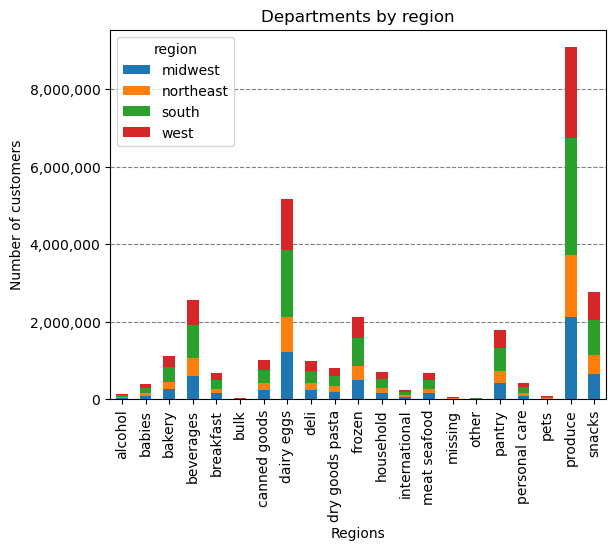

In [44]:
# creating bar chart
dept_region_crosstab.plot.bar(stacked = True)
plt.title('Departments by region')
plt.ylabel('Number of customers')
plt.xlabel('Regions')
plt.gca().set_axisbelow (True)
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.gca().yaxis.set_major_formatter(format('{x:,.0f}'))
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_by_region.png'), bbox_inches='tight')

## Avg spend per department

In [49]:
# comparing departments and their average price
ords_prods_all.groupby('department').agg({'prices':['mean']})

,prices
,mean
department,
alcohol,8.150699
babies,7.634399
bakery,7.857482
beverages,7.682556
breakfast,8.031647
bulk,8.346919
canned goods,7.546660
dairy eggs,8.336372


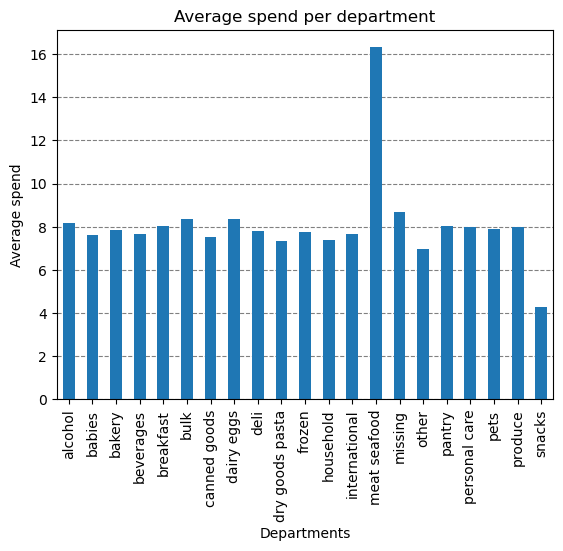

In [50]:
# creating bar chart
ords_prods_all.groupby('department').agg({'prices':['mean']}).plot.bar()
plt.title('Average spend per department')
plt.ylabel('Average spend')
plt.xlabel('Departments')
plt.gca().set_axisbelow (True)
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.gca().yaxis.set_major_formatter(format('{x:,.0f}'))
plt.legend().remove()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'avg_spend_dept.png'), bbox_inches='tight')

This is an interesting department visual. It shows that the meat and seafood category is a department that is bringing in much more money compared to the others, pretty much double. This is something that could be highlighted when pushing CPG ads as it is a higher cash return per product.

In [113]:
ords_prods_all.shape

(30964564, 37)

In [115]:
# exporting updated dataframe
ords_prods_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_v4.pkl'))

# Savepoint

This is the end of a section, where I will be breaking the script into a section to improve computer function and minimize RAM usage.

In [5]:
# import updated data set
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_v4.pkl'))

In [6]:
ords_prods_all.shape

(30964564, 37)

# 09. Producing charts for project

## Busiest days of the week

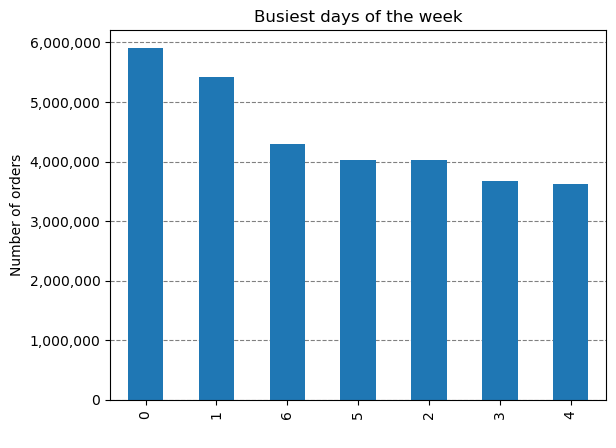

In [53]:
# creating bar chart
ords_prods_all['order_day_of_week'].value_counts().plot.bar()
plt.title('Busiest days of the week')
plt.ylabel('Number of orders')
plt.xlabel(' ')
plt.gca().set_axisbelow (True)
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.gca().yaxis.set_major_formatter(format('{x:,.0f}'))
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'busiest_days.png'), bbox_inches='tight')

## Busiest hours of the week

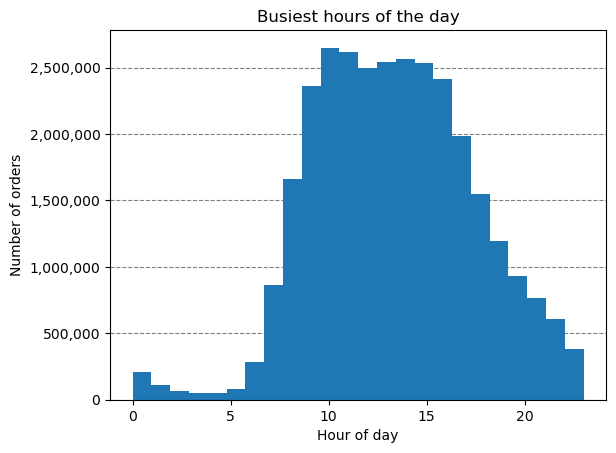

In [55]:
ords_prods_all['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Busiest hours of the day')
plt.ylabel('Number of orders')
plt.xlabel('Hour of day')
plt.gca().set_axisbelow (True)
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.gca().yaxis.set_major_formatter(format('{x:,.0f}'))
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'busiest_hours.png'), bbox_inches='tight')

## Money being spent during the day

To do this, I will be creating a line graph to show the trend of prices per order throughout a day. A randomized sample will be utilized for the line chart.

In [13]:
# creating list holding True/False values to the test np.random.rant() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_all)) <= 0.7

In [14]:
# Store 70% of the sample in the dataframe big
big = ords_prods_all[dev]

In [15]:
# Store 30% of the sample in the dataframe small
small = ords_prods_all[~dev]

In [82]:
# isolating df to the columns that are needed
line_chart_df = small[['order_hour_of_day', 'prices']]

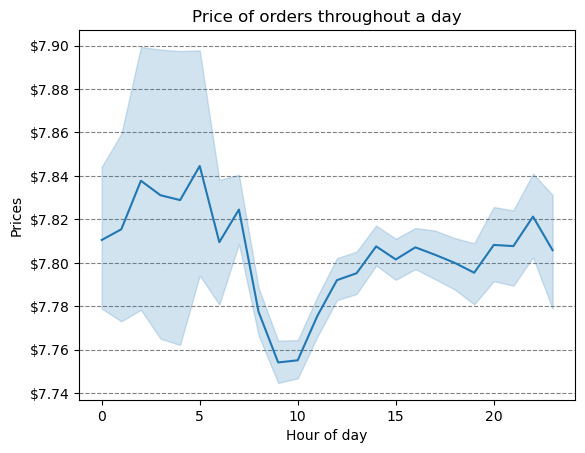

In [84]:
line = sns.lineplot(data = line_chart_df, x = 'order_hour_of_day', y = 'prices')
plt.title('Price of orders throughout a day')
plt.ylabel('Prices')
plt.xlabel('Hour of day')
plt.gca().set_axisbelow (True)
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.gca().yaxis.set_major_formatter(format('${x:,.2f}'))

In [88]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orderprices_per_hour.png'))

## Highlighting different prices of products

In [58]:
product_id_no_dups = ords_prods_all.drop_duplicates('product_id')

In [59]:
# creating a crosstab of price_range_loc and departments
price_dept_crosstab = pd.crosstab(product_id_no_dups['department'], product_id_no_dups['price_range_loc'], dropna = False)

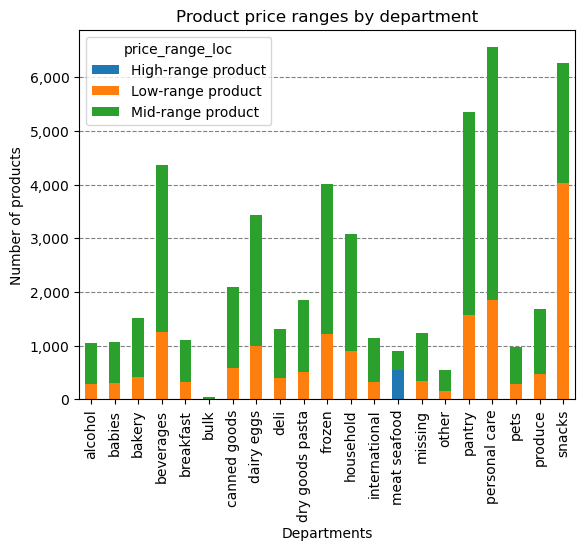

In [60]:
price_dept_crosstab.plot.bar(stacked = True)
plt.title('Product price ranges by department')
plt.ylabel('Number of products')
plt.xlabel('Departments')
plt.gca().set_axisbelow (True)
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.gca().yaxis.set_major_formatter(format('{x:,.0f}'))
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'product_range_by_dept.png'), bbox_inches='tight')

I first removed the duplicate product id's to view the distinct product id's, then created a bar graph to show where the different product ranges live.

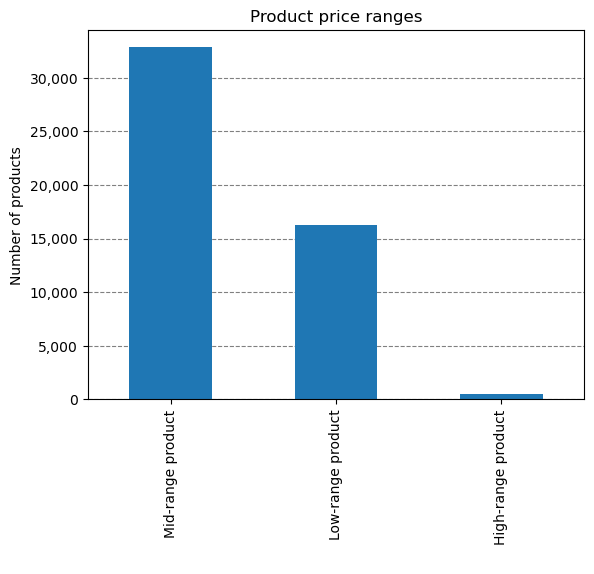

In [64]:
product_id_no_dups['price_range_loc'].value_counts().plot.bar()
plt.title('Product price ranges')
plt.ylabel('Number of products')
plt.xlabel(' ')
plt.gca().set_axisbelow (True)
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.gca().yaxis.set_major_formatter(format('{x:,.0f}'))
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'product_price_range.png'), bbox_inches='tight')

This graph took a step back to view where the distinct product id's fall into each respective price range category.

## Highlighting department popularity

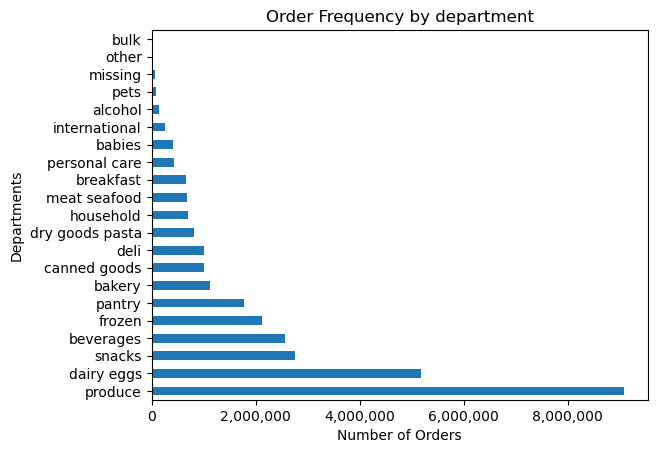

In [66]:
ords_prods_all['department'].value_counts().plot.barh()
plt.title('Order Frequency by department')
plt.ylabel('Departments')
plt.xlabel('Number of Orders')
plt.gca().xaxis.set_major_formatter(format('{x:,.0f}'))
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_popularity.png'), bbox_inches='tight')

## Loyalty flag distribution

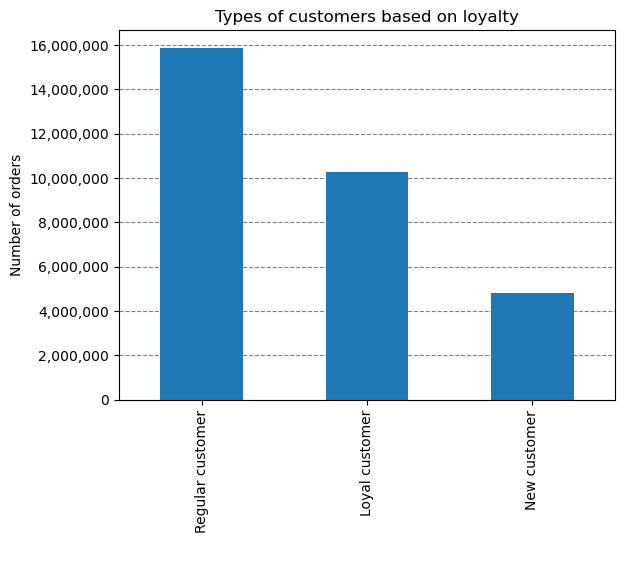

In [68]:
ords_prods_all['loyalty_flag'].value_counts().plot.bar()
plt.title('Types of customers based on loyalty')
plt.ylabel('Number of orders')
plt.xlabel(' ')
plt.gca().set_axisbelow (True)
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.gca().yaxis.set_major_formatter(format('{x:,.0f}'))
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag.png'), bbox_inches='tight')

## Frequency flag distribution

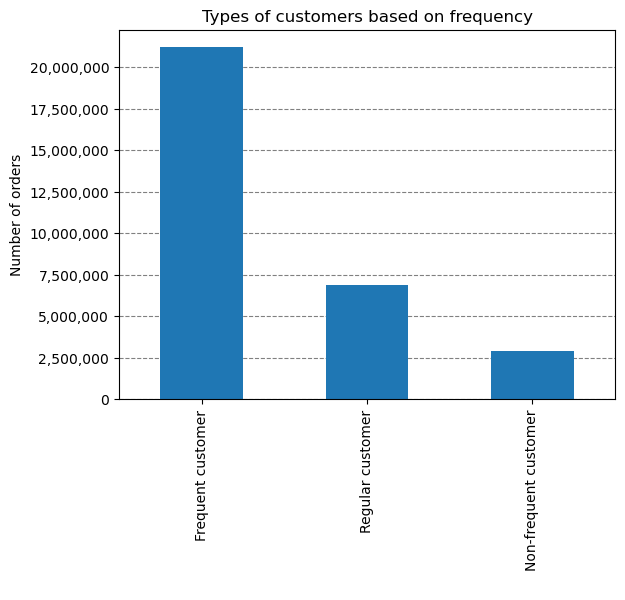

In [70]:
ords_prods_all['frequency_flag'].value_counts().plot.bar()
plt.title('Types of customers based on frequency')
plt.ylabel('Number of orders')
plt.xlabel(' ')
plt.gca().set_axisbelow (True)
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.gca().yaxis.set_major_formatter(format('{x:,.0f}'))
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frequency_flag.png'), bbox_inches='tight')

## Finding other demographic information

In [17]:
# isolating df to the columns that are needed
scatterplot_df = small[['fam_status', 'age', 'income']]

In [18]:
scatterplot_df['fam_status'].value_counts(dropna = False)

fam_status
married                             6523789
single                              1526977
divorced/widowed                     793469
living with parents and siblings     444233
Name: count, dtype: int64

In [19]:
color_mapping = {'married':'blue','single':'green','divorced/widowed':'orange','living with parents and siblings':'red'}

In [20]:
# assigning a color to a family status
scatterplot_df['color'] = scatterplot_df['fam_status'].map(color_mapping)

C:\Users\HP\AppData\Local\Temp\ipykernel_32740\1333365277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatterplot_df['color'] = scatterplot_df['fam_status'].map(color_mapping)


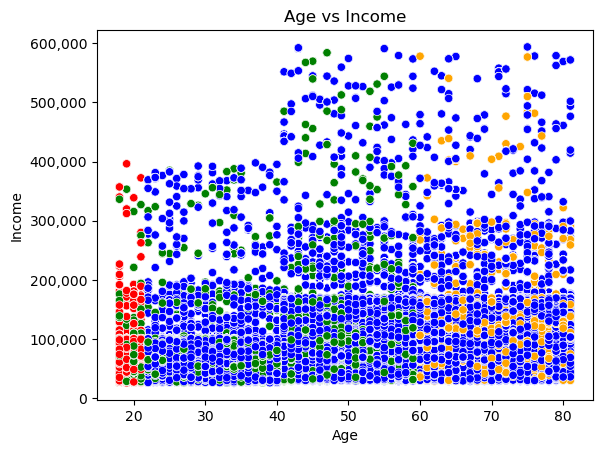

In [29]:
# creating a scatterplot
scatterplot = sns.scatterplot(data = scatterplot_df, x = 'age', y = 'income', c=scatterplot_df['color'])
plt.title('Age vs Income')
plt.ylabel('Income')
plt.xlabel('Age')
plt.gca().yaxis.set_major_formatter(format('{x:,.0f}'))

In [31]:
# saving visual
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_v_income.png'), bbox_inches='tight')